In [54]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [55]:
heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

heart_disease

Warning message:
“Duplicated column names deduplicated: '1.0' => '1.0_1' [3], '1.0' => '1.0_2' [6], '0.0' => '0.0_1' [12]”
Parsed with column specification:
cols(
  `63.0` = col_double(),
  `1.0` = col_double(),
  `1.0_1` = col_double(),
  `145.0` = col_double(),
  `233.0` = col_double(),
  `1.0_2` = col_double(),
  `2.0` = col_double(),
  `150.0` = col_double(),
  `0.0` = col_double(),
  `2.3` = col_double(),
  `3.0` = col_double(),
  `0.0_1` = col_character(),
  `6.0` = col_character(),
  `0` = col_double()
)



63.0,1.0,1.0_1,145.0,233.0,1.0_2,2.0,150.0,0.0,2.3,3.0,0.0_1,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


TABLE 1: Downloaded and pulled the raw data from the 'Heart Disease Dataset', UCI Machine Learning Repository

In [56]:
colnames(heart_disease) <- c("age",
                   "sex",
                   "cp",
                   "trestbps",
                   "chol",
                   "fbs",
                   "restecg",
                   "thalach",
                   "exang",
                   "oldpeak",
                   "slope",
                   "ca",
                   "thal", 
                            "num")
heart_disease

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


TABLE 2: Heart Disease data with relevant column names

In [59]:
# Changing thal to more accurately reflect the patient's condition based on the UCIML documentation
heart_disease$num[heart_disease$num==0] <-"<50% diameter narrowing"
heart_disease$num[heart_disease$num==1] <-">50% diameter narrowing"
heart_disease$num[heart_disease$num==2] <-">50% diameter narrowing"
heart_disease$num[heart_disease$num==3] <-">50% diameter narrowing"
heart_disease$num[heart_disease$num==4] <-">50% diameter narrowing"

heart_disease <- mutate(heart_disease, num = as_factor(num)) 
#filter(num == "<50% diameter narrowing" | num == ">50% diameter narrowing")

heart_disease


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,>50% diameter narrowing
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,>50% diameter narrowing
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,<50% diameter narrowing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,>50% diameter narrowing
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,>50% diameter narrowing
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,<50% diameter narrowing


TABLE 3: Predictor column mutated to include % diameter of blood vessels narrowing 

positive_diagnosis_age
<dbl>
56.6259


negative_diagnosis_age
<dbl>
52.52147


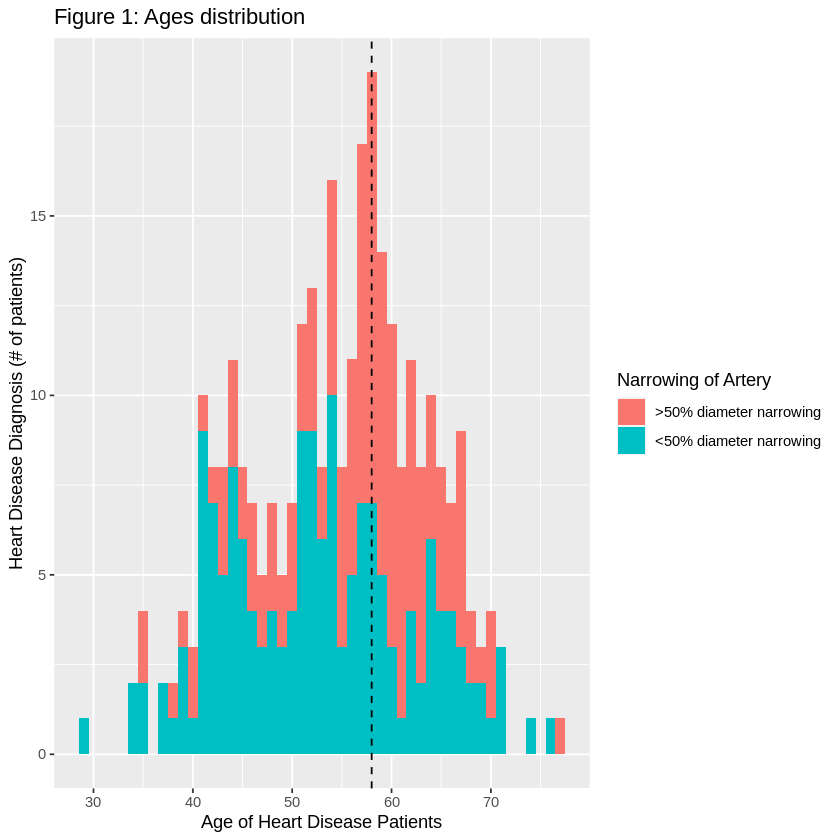

In [60]:
# ======== AGE DISTRIBUTION FOR ALL THE PEOPLE===============
heart_disease_age <- heart_disease %>% 
select(age, num)

age_plot <- ggplot(heart_disease_age, aes(x = age, fill = num)) + 
    geom_histogram(binwidth = 1) +
geom_vline(xintercept = 58, linetype = "dashed", size = 0.5)+
    labs(x = "Age of Heart Disease Patients", y = "Heart Disease Diagnosis (# of patients)", fill = "Narrowing of Artery")+
    ggtitle("Figure 1: Ages distribution")
age_plot

# =========== MEAN AGE FOR POSTIVE/NEGATIVE HEART DISEASE===============
age_pos_diagnosis_mean <- heart_disease %>%
select(age, num) %>% 
filter(num == ">50% diameter narrowing") %>%
summarize(positive_diagnosis_age = mean(age))

age_pos_diagnosis_mean

age_neg_diagnosis_mean <- heart_disease %>%
select(age, num) %>% 
filter(num == "<50% diameter narrowing") %>%
summarize(negative_diagnosis_age = mean(age))

age_neg_diagnosis_mean

positive_diagnosis_chol
<dbl>
251.4748


negative_diagnosis_chol
<dbl>
242.6994


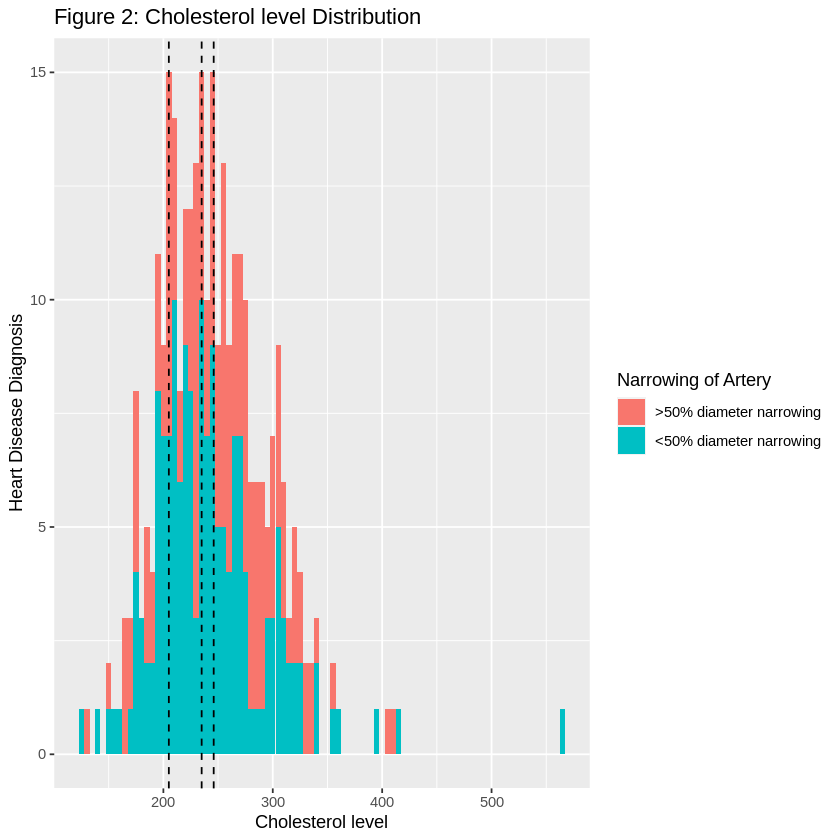

In [61]:
# ======== CHOLESTEROL LEVEL DISTRIBUTION FOR ALL THE PEOPLE ===============
heart_disease_chol <- heart_disease %>% 
select(chol,num)


chol_plot <- heart_disease_chol %>%
ggplot(aes(x = chol, fill = num)) +
geom_histogram(binwidth = 5) +
geom_vline(xintercept = 205, linetype = "dashed", size = 0.5)+
geom_vline(xintercept = 235, linetype = "dashed", size = 0.5)+
geom_vline(xintercept = 246, linetype = "dashed", size = 0.5)+
labs(x = "Cholesterol level", y = "Heart Disease Diagnosis", fill = "Narrowing of Artery")+
ggtitle("Figure 2: Cholesterol level Distribution")

chol_plot

# ======== MEAN CHOLESTEROL LEVEL FOR POSTIVE VS NEGATIVE DIAGNOSIS ===============
chol_pos_diagnosis_mean <- heart_disease %>%
select(chol, num) %>% 
filter(num == ">50% diameter narrowing") %>%
summarize(positive_diagnosis_chol = mean(chol))

chol_pos_diagnosis_mean

chol_neg_diagnosis_mean <- heart_disease %>%
select(chol, num) %>% 
filter(num == "<50% diameter narrowing") %>%
summarize(negative_diagnosis_chol = mean(chol))

chol_neg_diagnosis_mean

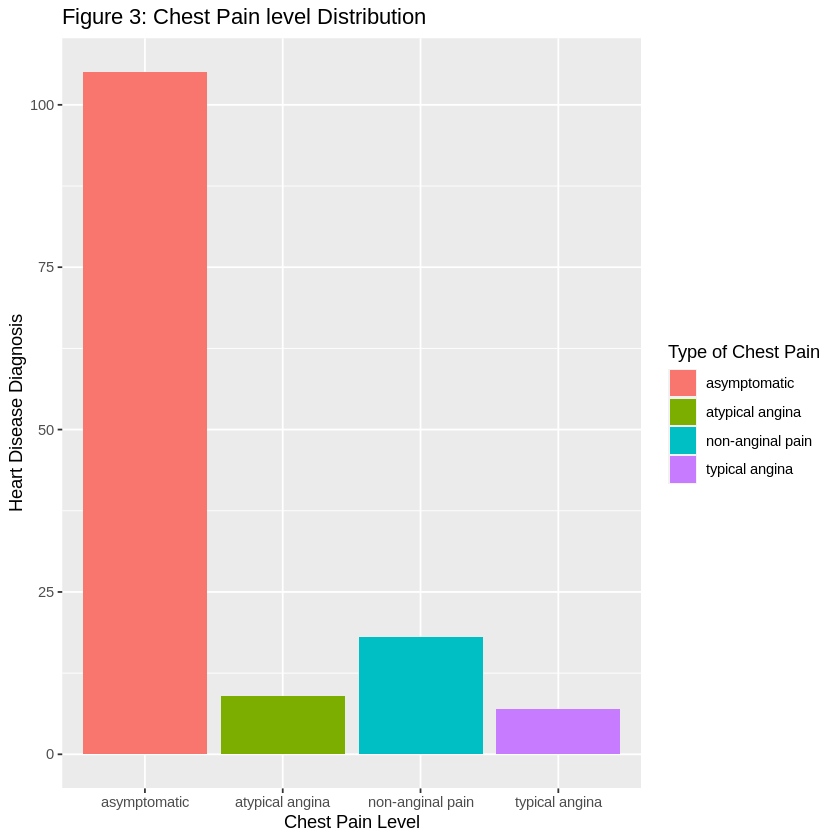

In [62]:
# ======== CHEST PAIN DISTRIBUTION FOR PEOPLE WITH >50 % NARROWING ===============
heart_disease_50_cp <- heart_disease %>% 
filter(num == ">50% diameter narrowing") %>%
select(cp, num)

heart_disease_50_cp$cp[heart_disease_50_cp$cp==1] <-"typical angina"
heart_disease_50_cp$cp[heart_disease_50_cp$cp==2] <-"atypical angina"
heart_disease_50_cp$cp[heart_disease_50_cp$cp==3] <-"non-anginal pain"
heart_disease_50_cp$cp[heart_disease_50_cp$cp==4] <-"asymptomatic"
#heart_disease_cp

cp_plot <- heart_disease_50_cp %>%
ggplot(aes(x = cp, fill = cp)) +
geom_bar() +
labs(x = "Chest Pain Level", y = "Heart Disease Diagnosis", fill = "Type of Chest Pain")+
ggtitle("Figure 3: Chest Pain level Distribution")

cp_plot

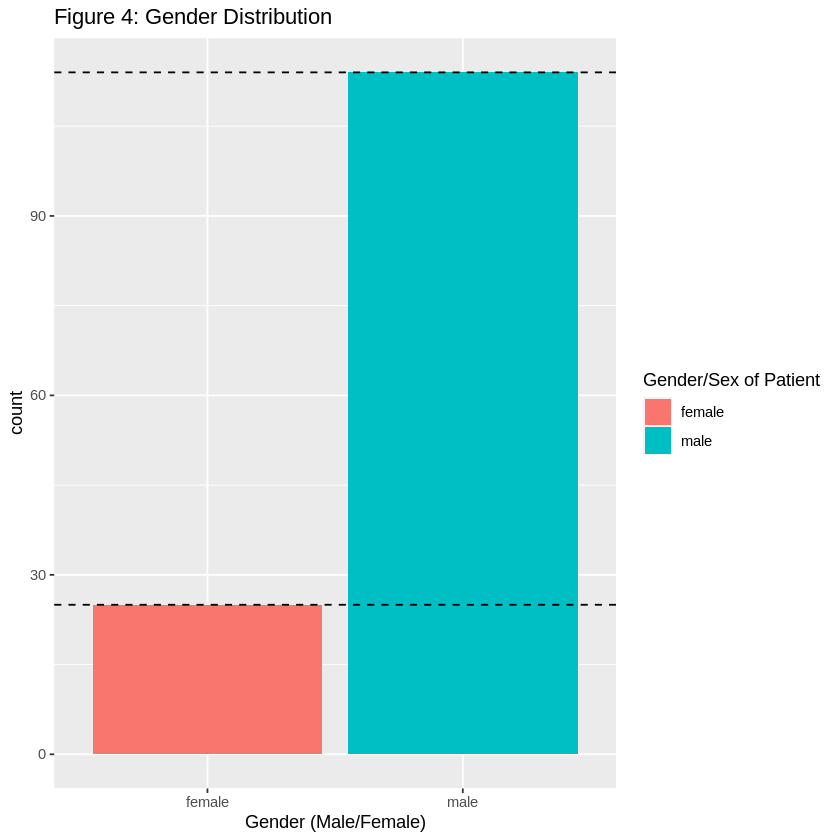

In [63]:
# ======== GENDER DISTRIBUTION FOR PEOPLE WITH >50 % NARROWING ===============
heart_50_sex <- heart_disease %>% 
filter(num == ">50% diameter narrowing") %>%
select(sex)

heart_50_sex$sex[heart_50_sex$sex==1] <-"male"
heart_50_sex$sex[heart_50_sex$sex==0] <-"female"
#heart_disease_sex


sex_plot <- heart_50_sex %>%
ggplot(aes(x = sex, fill = sex)) +
geom_bar() +
geom_hline(yintercept = 114, linetype = "dashed", size = 0.5)+
geom_hline(yintercept = 25, linetype = "dashed", size = 0.5)+
labs(x = "Gender (Male/Female)", "Heart Disease Diagnosis", fill = "Gender/Sex of Patient")+
ggtitle("Figure 4: Gender Distribution")

sex_plot

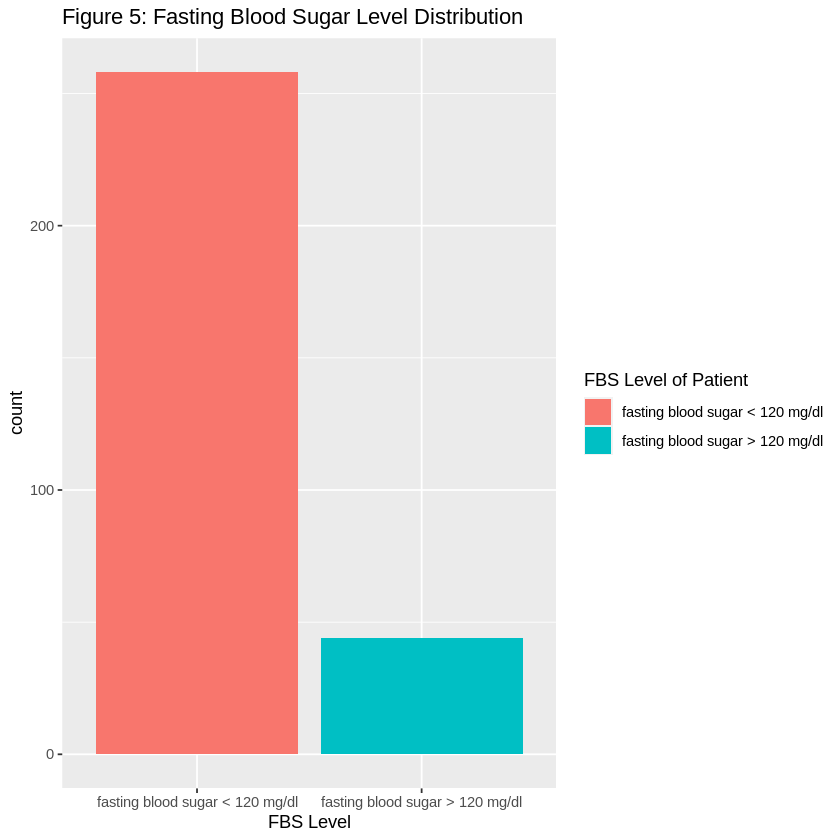

In [65]:
heart_disease_fbs <- heart_disease %>% 
select(fbs, num)

heart_disease_fbs$fbs[heart_disease_fbs$fbs==1] <-"fasting blood sugar > 120 mg/dl"
heart_disease_fbs$fbs[heart_disease_fbs$fbs==0] <-"fasting blood sugar < 120 mg/dl"

heart_disease_fbs_plot <- heart_disease_fbs %>%
ggplot(aes(x = fbs, fill = fbs)) +
geom_bar() +
labs(x = "FBS Level", "Heart Disease Diagnosis", fill = "FBS Level of Patient")+
ggtitle("Figure 5: Fasting Blood Sugar Level Distribution")

heart_disease_fbs_plot

In [66]:
heart_disease_scaled <- heart_disease %>%
    mutate(scaled_age = scale(age, center = TRUE),
           scaled_sex = scale(sex, center = TRUE),
           scaled_cp = scale(cp, center = TRUE),
           scaled_chol = scale(chol, center = TRUE))
heart_disease_scaled

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,scaled_age,scaled_sex,scaled_cp,scaled_chol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,>50% diameter narrowing,1.392608,0.6867343,0.8750283,0.75711513
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,>50% diameter narrowing,1.392608,0.6867343,0.8750283,-0.34206509
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,<50% diameter narrowing,-1.925916,0.6867343,-0.1736167,0.06289604
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,>50% diameter narrowing,0.2864333,0.6867343,0.8750283,-2.231884
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,>50% diameter narrowing,0.2864333,-1.4513456,-1.2222618,-0.207078
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,<50% diameter narrowing,-1.8152988,0.6867343,-0.1736167,-1.383394


TABLE 4: Shows the scaled predictor data from the Heart Disease dataset (UCI ML Repository)

In [11]:
set.seed(1234)

heart_disease_split <- initial_split(heart_disease_scaled, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [12]:
set.seed(1234)

heart_disease_recipe <- recipe(num ~ age + scaled_cp + scaled_chol, data = heart_disease_scaled) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
heart_disease_recipe

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [13]:
set.seed(1234)

heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)

heart_disease_resample_fit <- workflow() %>%
        add_recipe(heart_disease_recipe) %>%
        add_model(knn_spec) %>%
        fit_resamples(resamples = heart_disease_vfold)


In [14]:
set.seed(1234)

heart_disease_metrics <-collect_metrics(heart_disease_resample_fit)
heart_disease_metrics

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,binary,0.6934300,5,0.02978550
roc_auc,binary,0.7595635,5,0.03122937


TABLE 5: Cross-Validation's Accuracy 

In [15]:
set.seed(1234)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
        set_engine("kknn") %>%
        set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [16]:
set.seed(1234)

knn_results <- workflow() %>%
        add_recipe(heart_disease_recipe) %>%
        add_model(knn_tune) %>%
        tune_grid(resamples = heart_disease_vfold, grid = 10) %>%
        collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.6713043,5,0.02786925,Model01
2,roc_auc,binary,0.6877381,5,0.03083128,Model01
3,accuracy,binary,0.6712077,5,0.01455189,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,binary,0.7655476,5,0.03206407,Model09
14,accuracy,binary,0.7241546,5,0.03110601,Model10
14,roc_auc,binary,0.7630556,5,0.03566695,Model10


TABLE 6: Results of the workflow

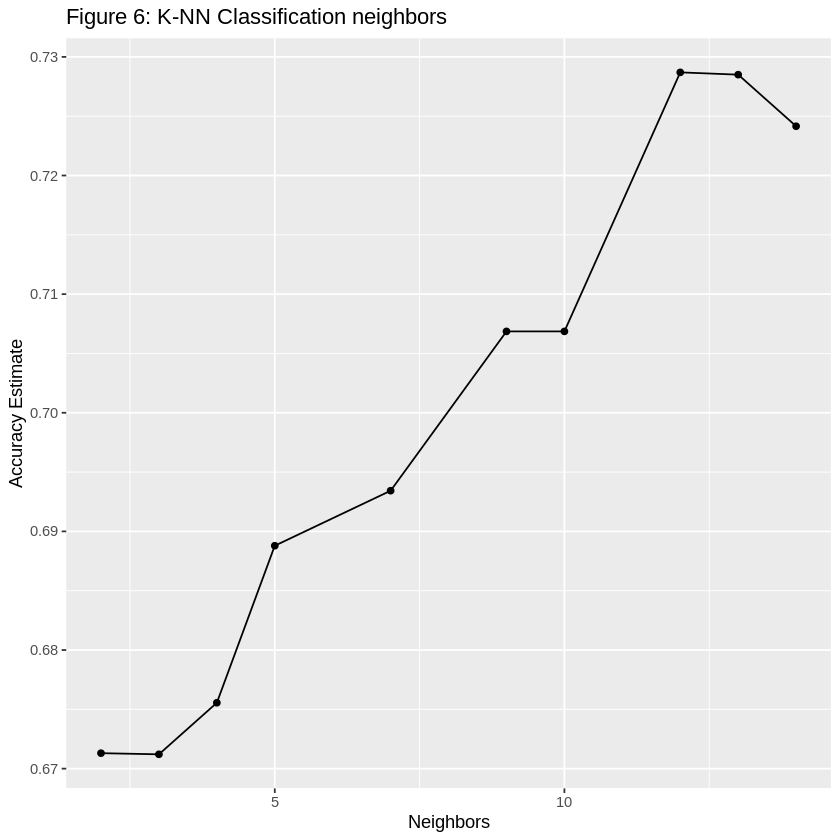

In [67]:
set.seed(1234)

accuracies <- knn_results %>%
        filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "Accuracy Estimate")+ 
ggtitle("Figure 6: K-NN Classification neighbors")
        

accuracy_versus_k

Figure 6: Plot shows that 11 NEIGHBORS IS THE OPTIMUM PARAMETER

In [18]:
set.seed(1234)

heart_disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) %>%
  set_engine("kknn") %>%
  set_mode("classification")

heart_disease_workflow <- workflow() %>%
  add_recipe(heart_disease_recipe) %>%
  add_model(heart_disease_spec) %>%
  fit(data = heart_disease_train)

heart_disease_workflow

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~11, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2938596
Best kernel: rectangular
Best k: 11

In [19]:
set.seed(1234)

heart_disease_predictions <- predict(heart_disease_workflow, heart_disease_test) %>%
  bind_cols(heart_disease_test)

heart_disease_predictions

.pred_class,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,scaled_age,scaled_sex,scaled_cp,scaled_chol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
<50% diameter narrowing,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,<50% diameter narrowing,-1.4834463,-1.451346,-1.2222618,-0.8241617
>50% diameter narrowing,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,>50% diameter narrowing,0.8395207,-1.451346,0.8750283,0.4100056
>50% diameter narrowing,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,<50% diameter narrowing,0.2864333,-1.451346,0.8750283,2.0684178
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
>50% diameter narrowing,59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,>50% diameter narrowing,0.5076683,0.6867343,0.8750283,-1.3641098
<50% diameter narrowing,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,>50% diameter narrowing,-1.0409764,0.6867343,-2.2709068,0.3328701
>50% diameter narrowing,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,>50% diameter narrowing,1.5032256,0.6867343,0.8750283,-1.0362842


TABLE 7: Predictions of the Heart Disease Dataset Using Workflow & Testing Data

In [20]:
set.seed(1234)

heart_disease_predictions %>%
  metrics(truth = num, estimate = .pred_class) %>%
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7297297


In [21]:
confusion <- heart_disease_predictions %>%
             conf_mat(truth = num, estimate = .pred_class)

confusion

                         Truth
Prediction                >50% diameter narrowing <50% diameter narrowing
  >50% diameter narrowing                      25                      11
  <50% diameter narrowing                       9                      29

TABLE 7: Confusion Matrix